In [1]:
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import skimage
%matplotlib inline

(480, 409, 3)
(10, 10, 1, 30, 30, 3)
weights size = torch.Size([100, 1, 30, 30, 3])
torch.Size([1, 1, 300, 300])


/home/justin/code/sumie/venv/lib/python3.6/site-packages/skimage/util/shape.py:94: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


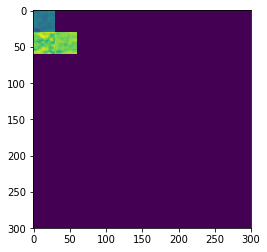

In [2]:
im = Image.open('penguin.jpg')
plt.imshow(im)

original_im = np.asarray(im)
print(original_im.shape)
target = torch.Tensor(original_im[:300,:300,0])
target = target.unsqueeze(0).unsqueeze(0)

f_size = 30
filters = skimage.util.view_as_blocks(original_im[:10*f_size,:10*f_size,:], (f_size, f_size, 3))
print(filters.shape)

filters = filters.reshape(-1,f_size,f_size,3)
cropped = np.squeeze(filters[1,:,:,0])
plt.imshow(cropped)
f = torch.Tensor(filters)
weights = torch.unsqueeze(f, 1)
print(f"weights size = {weights.size()}")
n_filters = weights.size(0)

conv = nn.ConvTranspose2d(n_filters, 1, f_size, stride=f_size, bias=False)
conv.weight = torch.nn.Parameter(weights[:,:,:,:,0])
x = torch.zeros(1, 100, 10, 10)
x[0,0,0,0] = 1
x[0,10,1,0] = 2
x[0,0,1,1] = 1
x[0,1,1,1] = 1
out = conv(x)
print(out.size())
plt.imshow(np.squeeze(out.detach()))
plt.show()
#plt.imshow(np.squeeze(weights[0,:,:,:,0]))

In [3]:
montage_map = torch.zeros(1, 100, 10, 10)
montage_map.requires_grad = True

optimiser = torch.optim.Adam([montage_map,], lr=1e-2)
mse = nn.MSELoss()

out = conv(montage_map)
print(out.size())
print(target.size())
print_update = 50

for i in range(50):
    optimiser.zero_grad()
    
    out = conv(montage_map)
    
    output = mse(out, target)
    output.backward()
    
    if i % print_update == 0:
        print(output)
    optimiser.step()
    #print(im.grad)

torch.Size([1, 1, 300, 300])
torch.Size([1, 1, 300, 300])
tensor(30763.8711, grad_fn=<MseLossBackward>)


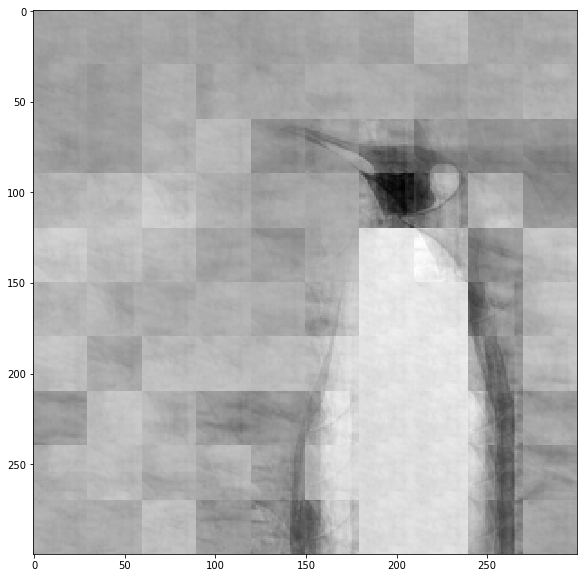

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(np.squeeze(out.detach()), cmap='gray')

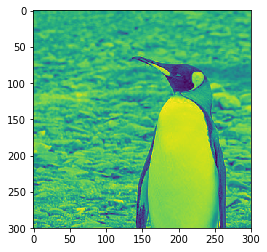

In [5]:
plt.imshow(np.squeeze(target.detach()))

In [6]:
net = torchvision.models.alexnet(pretrained=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 11, 11])


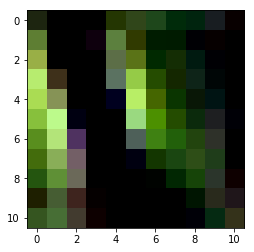

In [7]:
alex_filters = net.features[0].weight
print(alex_filters.size())
plt.imshow(5*np.squeeze(alex_filters[10,:,:,:].detach().permute(2,1,0)))

torch.Size([64, 1, 11, 11])
torch.Size([1, 1, 220, 220])


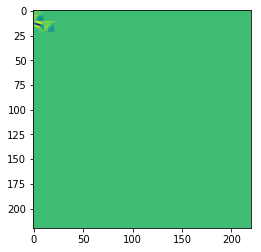

In [8]:
f_size = 11

n_filters = alex_filters.size(0)
print(torch.unsqueeze(alex_filters[:,0,:,:], 1).size())

target = torch.Tensor(original_im[:220,:220,0])
target = target.unsqueeze(0).unsqueeze(0)

conv = nn.ConvTranspose2d(n_filters, 1, f_size, stride=f_size, bias=False)
conv.weight = torch.nn.Parameter(torch.unsqueeze(alex_filters[:,0,:,:], 1))
x = torch.zeros(1, 64, 20, 20)
x[0,0,0,0] = 1
x[0,10,1,0] = 2
x[0,0,1,1] = 1
x[0,1,1,1] = 1
out = conv(x)
print(out.size())
plt.imshow(np.squeeze(out.detach()))
plt.show()

torch.Size([1, 1, 220, 220])
torch.Size([1, 1, 220, 220])
tensor(30486.5840, grad_fn=<MseLossBackward>)
tensor(2380.1824, grad_fn=<MseLossBackward>)
tensor(2364.7361, grad_fn=<MseLossBackward>)
tensor(2364.7180, grad_fn=<MseLossBackward>)
tensor(2364.7410, grad_fn=<MseLossBackward>)


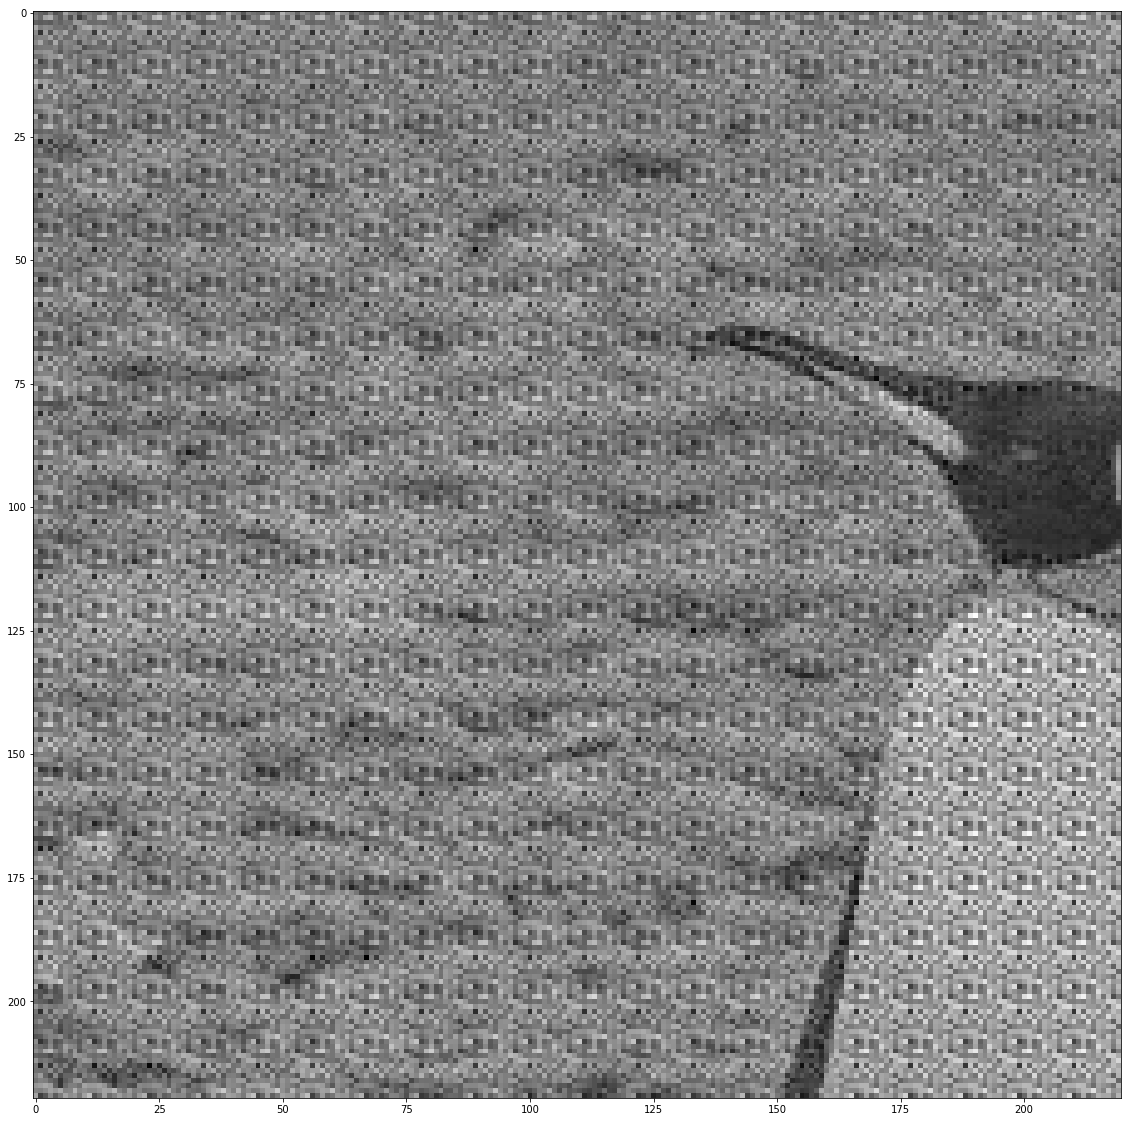

In [9]:
montage_map = torch.zeros(1, 64, 20, 20)
montage_map.requires_grad = True

optimiser = torch.optim.Adam([montage_map,], lr=10)
mse = nn.MSELoss()

out = conv(montage_map)
print(out.size())
print(target.size())
print_update = 1000

for i in range(5000):
    optimiser.zero_grad()
    
    out = conv(montage_map)
    
    output = mse(out, target)
    output.backward()
    
    if i % print_update == 0:
        print(output)
        
    if i % 2000 == 0:
        optimiser.lr = 1
        
    optimiser.step()
    #print(im.grad)
    
plt.figure(figsize=(20,20))
plt.imshow(np.squeeze(out.detach()), cmap='gray')

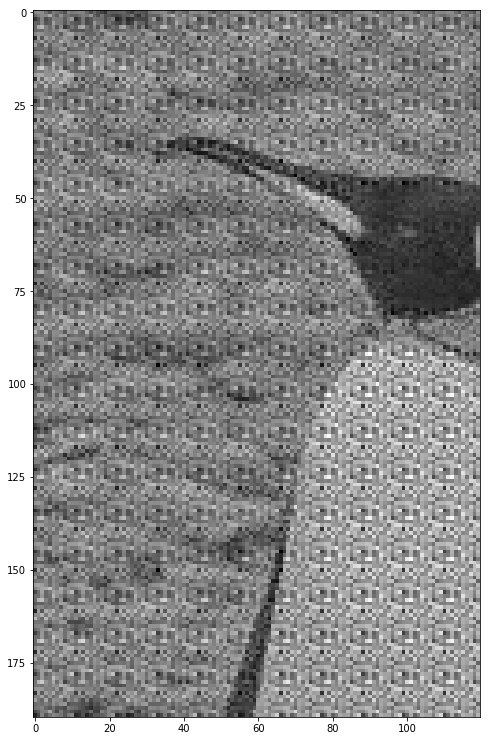

In [10]:
plt.figure(figsize=(10,13))
plt.imshow(np.squeeze(out.detach())[30:,100:], cmap='gray')